<a href="https://colab.research.google.com/github/shakeelrifathcse/Data_analysis_pract_using_python/blob/main/pandas_small_case_study_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd

In [ ]:
sales = pd.read_csv('/content/Coffee_Shop_Sales.csv')

In [ ]:
sales.head(10)

,Date,Product,Quantity,Revenue
0,2024-01-01,Espresso,10,50
1,2024-01-02,Latte,15,75
2,2024-02-01,Cappuccino,20,100
3,2024-02-15,Americano,8,40
4,2024-03-05,Mocha,12,60
5,2024-03-10,Espresso,14,70
6,2024-04-01,Latte,18,90
7,2024-04-02,Cappuccino,15,75
8,2024-05-15,Americano,10,50
9,2024-06-10,Mocha,13,65


In [ ]:
sales.isnull().sum()

,0
Date,0
Product,0
Quantity,0
Revenue,0


In [ ]:
sales.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10 entries, 0 to 9
Data columns (total 4 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   Date      10 non-null     object
 1   Product   10 non-null     object
 2   Quantity  10 non-null     int64 
 3   Revenue   10 non-null     int64 
dtypes: int64(2), object(2)
memory usage: 448.0+ bytes


In [ ]:

sales['Date'] = pd.to_datetime(sales['Date'])
sales.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10 entries, 0 to 9
Data columns (total 4 columns):
 #   Column    Non-Null Count  Dtype         
---  ------    --------------  -----         
 0   Date      10 non-null     datetime64[ns]
 1   Product   10 non-null     object        
 2   Quantity  10 non-null     int64         
 3   Revenue   10 non-null     int64         
dtypes: datetime64[ns](1), int64(2), object(1)
memory usage: 448.0+ bytes


In [ ]:
sales.describe()

,Date,Quantity,Revenue
count,10,10.000000,10.000000
mean,2024-03-09 21:36:00,13.500000,67.500000
min,2024-01-01 00:00:00,8.000000,40.000000
25%,2024-02-04 12:00:00,10.500000,52.500000
50%,2024-03-07 12:00:00,13.500000,67.500000
75%,2024-04-01 18:00:00,15.000000,75.000000
max,2024-06-10 00:00:00,20.000000,100.000000
std,NaN,3.719319,18.596595


Total Revenue Analysis

In [ ]:
total_revenue = sales["Revenue"].sum()
print("Total revenue of the coffe shop is {}".format(total_revenue))

Total revenue of the coffe shop is 675


Average Revenue per Product

In [ ]:
avg_rev_product = sales.groupby(["Product"])
a = avg_rev_product["Revenue"].mean()
a.sort_values(ascending = False)

,Revenue
Product,
Cappuccino,87.5
Latte,82.5
Mocha,62.5
Espresso,60.0
Americano,45.0


Top 3 Best-Selling Products by Quantity

In [ ]:
best_selling_items = sales.groupby("Product")
q = best_selling_items["Quantity"].sum()
q.sort_values(ascending = False).head(3)

,Quantity
Product,
Cappuccino,35
Latte,33
Mocha,25


 Monthly Revenue Trend


In [ ]:
sales['Month'] = sales['Date'].dt.month
sales["Day"] = sales["Date"].dt.day

sales

,Date,Product,Quantity,Revenue,Month,Year,Day
0,2024-01-01,Espresso,10,50,1,2024-01-01,1
1,2024-01-02,Latte,15,75,1,2024-01-02,2
2,2024-02-01,Cappuccino,20,100,2,2024-02-01,1
3,2024-02-15,Americano,8,40,2,2024-02-15,15
4,2024-03-05,Mocha,12,60,3,2024-03-05,5
5,2024-03-10,Espresso,14,70,3,2024-03-10,10
6,2024-04-01,Latte,18,90,4,2024-04-01,1
7,2024-04-02,Cappuccino,15,75,4,2024-04-02,2
8,2024-05-15,Americano,10,50,5,2024-05-15,15
9,2024-06-10,Mocha,13,65,6,2024-06-10,10


In [ ]:
month_rev = sales.groupby("Month")["Revenue"].sum()
month_rev.sort_values(ascending = False)

,Revenue
Month,
4,165
2,140
3,130
1,125
6,65
5,50


Most Profitable Day

In [ ]:
profitable_day = sales.groupby("Day")["Revenue"].sum()
p = profitable_day.sort_values(ascending = False)
p

,Revenue
Day,
1,240
2,150
10,135
15,90
5,60


# Ai genrated plots

Visualize Product Sales Over Time

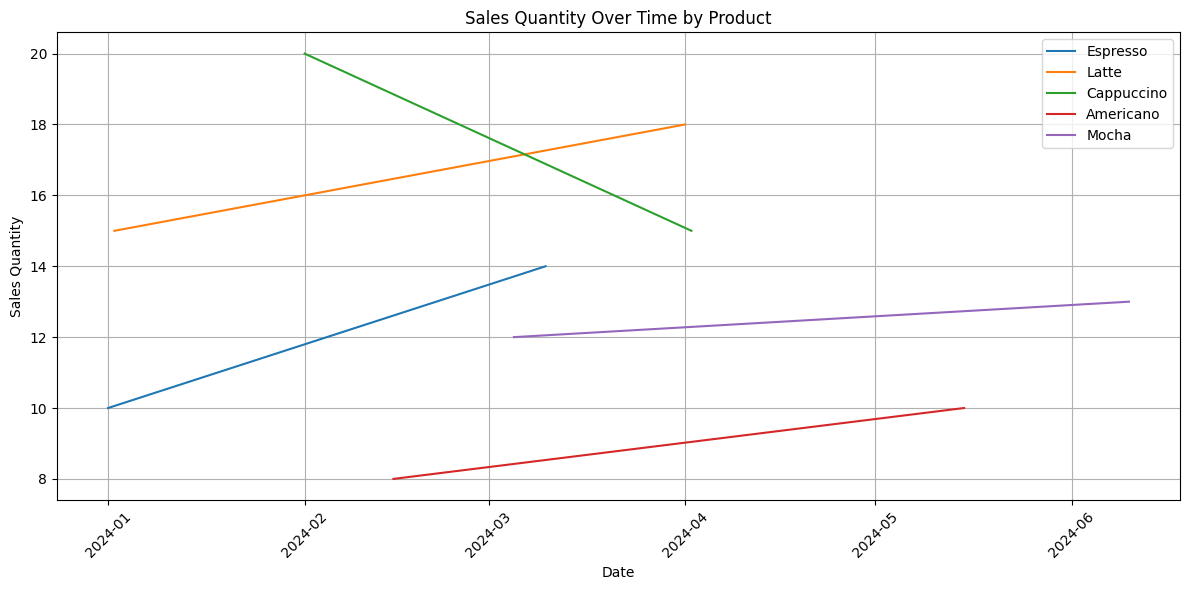

In [ ]:
# prompt: Task: Create a line plot of sales quantity over time for each product to identify sales trends.
# Hint: After grouping by both Date and Product, use plotting functions to see how the sales of each product vary over time.

import matplotlib.pyplot as plt

# Group sales data by date and product
sales_by_date_product = sales.groupby(['Date', 'Product'])['Quantity'].sum().reset_index()

# Create the line plot
plt.figure(figsize=(12, 6))
for product in sales_by_date_product['Product'].unique():
    product_sales = sales_by_date_product[sales_by_date_product['Product'] == product]
    plt.plot(product_sales['Date'], product_sales['Quantity'], label=product)

plt.xlabel('Date')
plt.ylabel('Sales Quantity')
plt.title('Sales Quantity Over Time by Product')
plt.legend()
plt.grid(True)
plt.xticks(rotation=45)  # Rotate x-axis labels for better readability
plt.tight_layout()
plt.show()